In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns

pip install wordcloud를 실행해서 wordcloud를 설치하면 1.9.x 버전이 설치된다.  
wordcloud 1.9.x 버전은 python에서 2023-9-1 현재 generate() 메소드를 실행하면 'ValueError: Only supported for TrueType fonts' 에러가 발생되며 정상 동작을 하지 못하므로 pip install wordcloud==1.8.0와 같이 실행해서 1.9.x 버전이 아닌 1.8 버전을 설치한다.

In [ ]:
from wordcloud import WordCloud

In [ ]:
text = open('./data/wordData.txt').read()
print(text)

단어별 출현 빈도를 계산한다.

In [ ]:
# generate() 메소드로 단어별 출현 빈도수를 비율로 계산한다.
wordcloud = WordCloud().generate(text)
# 단어별 출현 빈도수 비율은 WordCloud()의 words_ 속성으로 확인할 수 있다.
wordcloud.words_

In [ ]:
plt.figure(figsize=(15, 10))
# imshow() 함수로 단어별 출현 빈도수를 이미지로 출력한다.
plt.imshow(wordcloud, interpolation='bilinear')
# 워드클라우드 이미지에 나타는 x, y축 눈금을 표시하지 않는다.
plt.axis('off')
plt.show()

<img src="./images/interpolation.png" width="800" align="left"/>

In [ ]:
# WordCloud()의 인수로 max_font_size 옵션을 지정하면 최고로 출현 빈도가 높은 단어의 크기를 지정한다.
wordcloud = WordCloud(max_font_size=50).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# WordCloud()의 인수로 max_words 옵션을 지정하면 워드클라우드에 표시될 단어의 개수를 지정한다.
wordcloud = WordCloud(max_font_size=50, max_words=10).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
text = open('./data/alice.txt').read()
print(text)

In [ ]:
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 워드클라우드 모양으로 사용할 이미지에서 마스킹 데이터를 뽑아내기 위한 라이브러리를 import 한다.
from PIL import Image

In [ ]:
alice_mask = np.array(Image.open('./images/alice_mask.png'))
alice_mask

In [ ]:
plt.figure(figsize=(15, 10))
plt.imshow(alice_mask, interpolation='bilinear', cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [ ]:
# 불용어(stop word) 처리를 위해 import 한다.
# 불용어란 자주 등장하지만 의미가 없는 즉, 워드클라우드로 작성할 단어 목록에서 제외시킬 단어를 말한다.
from wordcloud import STOPWORDS

In [ ]:
# 불용어 데이터셋을 불러온다.
stopwords = set(STOPWORDS)
print(len(stopwords))
stopwords

In [ ]:
# 불용어를 추가한다.
stopwords.add('said')
stopwords

In [ ]:
# 불용어를 제거한다.
stopwords.remove('said')
stopwords

In [ ]:
# 워드클라우드 설정
# 흰색 배경, 표시할 최대 단어 개수 200개, 불용어 적용, 마스크 이미지는 alice_mask를 사용한다.
wordcloud = WordCloud(
    max_words=200, 
    background_color='white',
    stopwords=stopwords,
    mask=alice_mask
).generate(text)
# wordcloud.words_

In [ ]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

워드클라우드를 그레이스케일로 표시하는 함수를 만든다.

In [7]:
import random

In [5]:
# word: 워드클라우드로 표시할 단어
# font_size: 워드클라우드로 표시할 단어의 크기
# position: 워드클라우드로 표시할 단어의 위치(좌표)
# orientation: 워드클라우드로 표시할 단어의 방향
# random_state: 숫자를 넘겨주면 워드클라우드로 표시되는 단어들이 표시되는 위치가 고정된다.
# hwargs: 워드클라우드로 표시할 단어들의 글꼴이 저장된 경로}
def gray_color_func(word, font_size, position, orientation, random_state=None, **hwargs):
    # print(word, font_size, position, orientation, random_state, hwargs)
    return 'hsl(0, 0%%, %d%%)' % random.randint(30, 60)

In [ ]:
plt.figure(figsize=(15, 10))
plt.imshow(
    wordcloud.recolor(color_func=gray_color_func, random_state=200), 
    interpolation='bilinear'
)
plt.axis('off')
plt.show()

워드클라우드 작성순서

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from wordcloud import STOPWORDS

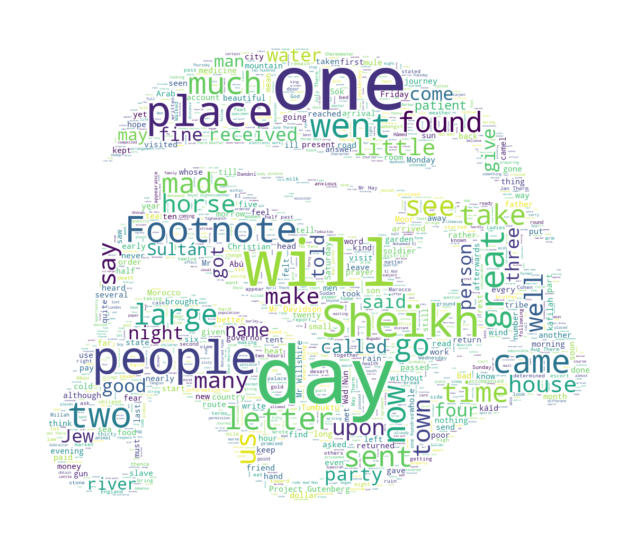

In [4]:
# text = open('./data/ebook.txt').read()
# 'cp949' codec can't decode byte 0xe2 in position ~~~ 에러가 발생되면 아래와 같이 실행한다.
text = open('./data/ebook.txt', encoding='utf-8').read()
# print(text)
mask = np.array(Image.open('./images/stormtrooper_mask.png'))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_words=2000, background_color='white', stopwords=stopwords, mask=mask).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

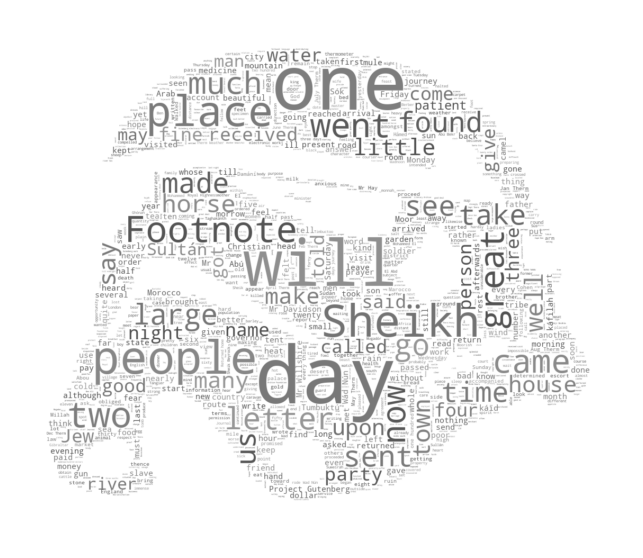

In [9]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud.recolor(color_func=gray_color_func, random_state=200), interpolation='bilinear')
plt.axis('off')
plt.show()

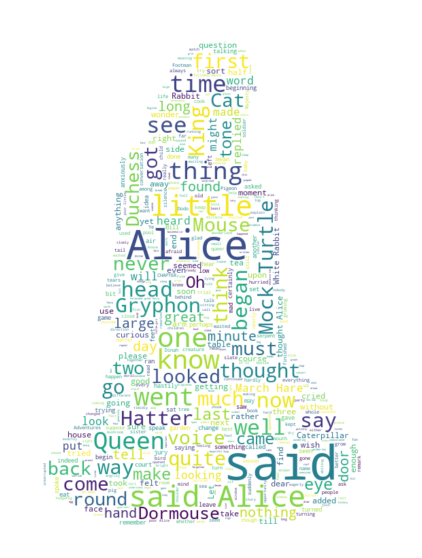

In [11]:
text = open('./data/alice.txt').read()
mask = np.array(Image.open('./images/alice_color.png'))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_words=2000, background_color='white', stopwords=stopwords, mask=mask, max_font_size=70).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

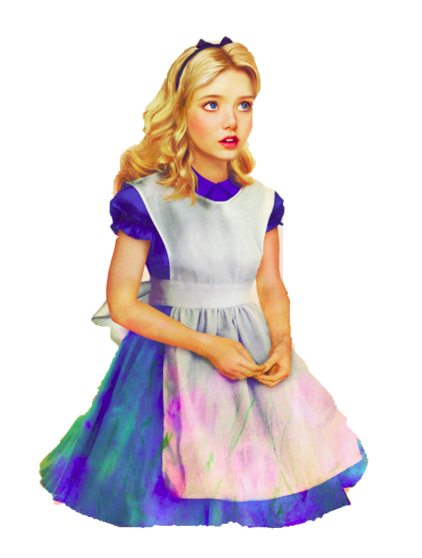

In [12]:
plt.figure(figsize=(15, 10))
plt.imshow(mask, interpolation='bilinear')
plt.axis('off')
plt.show()

워드클라우드의 마스크로 컬러 이미지를 사용할 경우 마스크로 사용한 이미지의 색상에 가깝게 워드클라우드 단어의 색상을 지정할 수 있다.

In [13]:
from wordcloud import ImageColorGenerator

In [14]:
image_colors = ImageColorGenerator(mask)

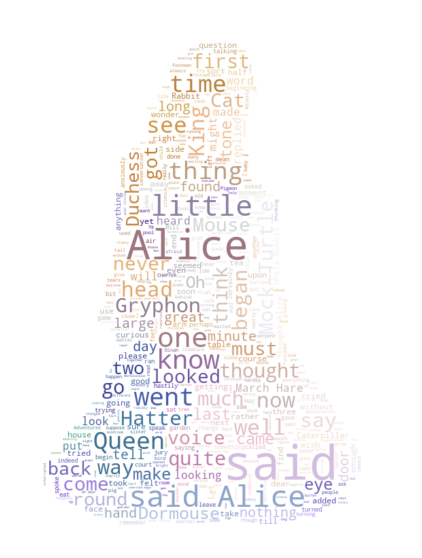

In [15]:
plt.figure(figsize=(15, 10))
# ImageColorGenerator 클래스 객체를 생성할 때 생성자로 넘겨준 mask 이미지로 생성된 객체를 recolor() 메소드의
# color_func 속성에 지정한다.
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

한글 워드클라우드